In [19]:
import numpy as np 
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt

from scipy.io import loadmat

import PIL
import cv2

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Transfert Learning
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50

from tensorflow.keras.models import load_model

import shutil
from sklearn.model_selection import train_test_split

from numpy import asarray
from PIL import Image

In [20]:
import numpy as np 
import pandas as pd 
import os
import glob
import matplotlib.pyplot as plt

from scipy.io import loadmat

import PIL
import cv2

from tensorflow import keras

import tensorflow as tf


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Transfert Learning
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50

from tensorflow.keras.models import load_model

import shutil
from sklearn.model_selection import train_test_split

from numpy import asarray
from PIL import Image

In [21]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]


In [109]:
os.mkdir("train")
os.mkdir("test")
os.mkdir("val")
#os.mkdir("Im2")

In [110]:
images_folder='Images'
for folder in os.listdir('Images'):
    os.makedirs("train/" + folder)
    os.makedirs("test/" + folder)
    os.makedirs("val/" + folder)
    #os.makedirs("Im2/" + folder)

In [105]:
a=0
from tensorflow.keras.preprocessing import image
def detect_and_crop(path):
        global a
         # chargement et transformation en array de l'image avec tensorflow
        img = image.load_img(path)
        img= image.img_to_array(img) 
        height, width, channels = img.shape
        # Detection des objets
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)

        class_ids = []
        confidences = []
        boxes = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    # On calcul les délimitations des boxes
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)
                    boxes.append([x, y, w, h])
                    
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
                    
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        for i in range(len(boxes)):
            label = str(classes[class_ids[i]])
            if i in indexes and label == 'dog':
                x, y, w, h = boxes[i]
                img = image.load_img(path)
                img = image.img_to_array(img)
                # On récuprere seulement la boxe contenant un chien
                crop_img = img[y:y+h, x:x+w]
                height, width, channels = crop_img.shape
                # On s'assure que l'image est de qualité suffisante
                if height > 150 and width > 150:
                    im = image.array_to_img(crop_img)
                    #on enregistre l'image dans un nouveau dossier Im3
                    im.save("Im3/{}/{}.jpg".format(path.split('/')[1],a))
                    a+=1            
          

In [106]:
for i in os.listdir('Images'):
    for j in os.listdir('Images/{}'.format(i)):
        path="Images/{}/{}".format(i,j)
        img=detect_and_crop(path)

In [111]:
dict={}
for i in os.listdir('Im3'):
    dict[i]=0
    for j in os.listdir('Im3/{}'.format(i)):
        dict[i]+=1

for i in os.listdir('Im3'):
    a=0
    liste=list(range(0,dict[i]))
    train,val=train_test_split(liste, test_size=0.1, random_state=1)
    train,test=train_test_split(train, test_size=0.1, random_state=1)
    for j in os.listdir('Im3/{}'.format(i)):
        path="Im3/{}/{}".format(i,j)
        if a in train:
            shutil.copy(path, "train/{}/{}".format(i,j))
        if a in test:
            shutil.copy(path, "test/{}/{}".format(i,j))
        if a in val:
            shutil.copy(path, "val/{}/{}".format(i,j))
        a+=1

In [113]:
dict_train={}
for i in os.listdir('train'):
    dict_train[i]=0
    for j in os.listdir('train/{}'.format(i)):
        dict_train[i]+=1

keys = list(dict_train.keys())
values = list(dict_train.values())

for i in keys :
    if dict_train[i] < 70 :
        print(i)

n02093859-Kerry_blue_terrier
n02099429-curly-coated_retriever
n02102973-Irish_water_spaniel
n02104029-kuvasz
n02105056-groenendael
n02105505-komondor
n02106382-Bouvier_des_Flandres
n02115641-dingo
n02115913-dhole
n02116738-African_hunting_dog


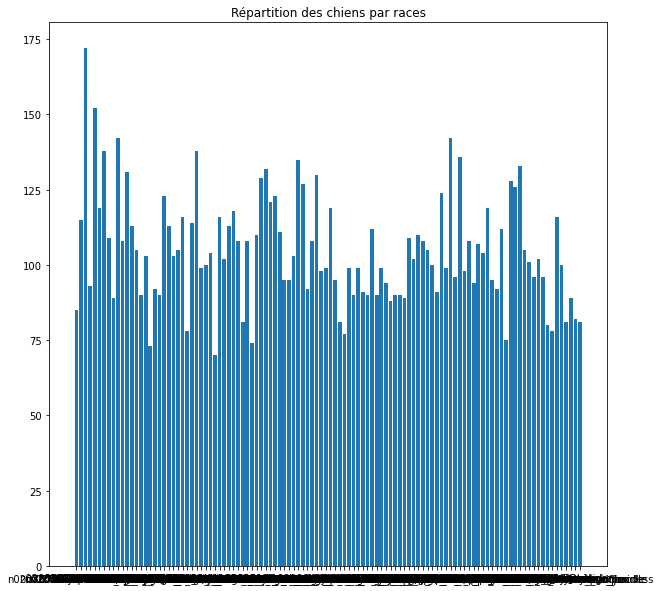

In [114]:
dict_train={}
for i in os.listdir('train'):
    dict_train[i]=0
    for j in os.listdir('train/{}'.format(i)):
        dict_train[i]+=1

keys = list(dict_train.keys())
values = list(dict_train.values())

for i in keys :
    if dict_train[i] < 70 :
        for j in os.listdir('train/{}'.format(i)):
            os.remove('train/{}/{}'.format(i,j))
        for j in os.listdir('val/{}'.format(i)):
            os.remove('val/{}/{}'.format(i,j))
        for j in os.listdir('test/{}'.format(i)):
            os.remove('test/{}/{}'.format(i,j))
        os.rmdir('train/{}'.format(i))
        os.rmdir('test/{}'.format(i))
        os.rmdir('val/{}'.format(i))
        
dict_train={}
for i in os.listdir('train'):
    dict_train[i]=0
    for j in os.listdir('train/{}'.format(i)):
        dict_train[i]+=1
        
keys = list(dict_train.keys())
values = list(dict_train.values())
        
plt.figure(figsize=(10,10))
plt.bar(keys,values)
plt.title("Répartition des chiens par races")
plt.show()

In [115]:
print(len(values))

110


In [116]:
print(max(values))
print(min(values))

172
70


In [117]:
def affichage(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(acc)), loss, label='Training Loss')
    plt.plot(range(len(acc)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [124]:
batch_size = 64
num_classes = len(values)
size=224
epochs=100

In [139]:
results = pd.DataFrame({})
def errors(name,model,x_train,x_val,x_test):
    global results
    train=model.evaluate(x_train)
    val=model.evaluate(x_val)
    test=model.evaluate(x_test)
    results = results.append(pd.DataFrame({
        'Modèle': [name],
        'acc':train[1],
        'val_acc':val[1],
        'evaluate(x_test)_acc':test[1],
        'loss':train[0],
        'val_loss':val[0],
        'evaluate(x_test)_loss':test[0],
        }))

In [126]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3,verbose=1)

# Données non détectées du P6

In [127]:
os.mkdir("train_P6")
os.mkdir("test_P6")
os.mkdir("val_P6")

images_folder='Images'
for folder in os.listdir('Images'):
    os.makedirs("train_P6/" + folder)
    os.makedirs("test_P6/" + folder)
    os.makedirs("val_P6/" + folder)

dict={}
for i in os.listdir('Images'):
    dict[i]=0
    for j in os.listdir('Images/{}'.format(i)):
        dict[i]+=1

for i in os.listdir('Images'):
    a=0
    for j in os.listdir('Images/{}'.format(i)):
        path="Images/{}/{}".format(i,j)
        liste=list(range(0,dict[i]))
        train_P6,val_P6=train_test_split(liste, test_size=0.1, random_state=1)
        train_P6,test_P6=train_test_split(train_P6, test_size=0.1, random_state=1)
        if a in train_P6:
            shutil.copy(path, "train_P6/{}/{}".format(i,j))
        if a in test_P6:
            shutil.copy(path, "test_P6/{}/{}".format(i,j))
        if a in val_P6:
            shutil.copy(path, "val_P6/{}/{}".format(i,j))
        a+=1

In [128]:
dict_train_P6={}
for i in os.listdir('train_P6'):
    dict_train_P6[i]=0
    for j in os.listdir('train_P6/{}'.format(i)):
        dict_train_P6[i]+=1

keys_P6 = list(dict_train_P6.keys())
values_P6 = list(dict_train_P6.values())

In [129]:
len(keys_P6)

120

In [130]:
#On conserve les memes 102 races pour ne pas fausser les résultats
for i in keys_P6:
    if i not in keys:
        for j in os.listdir('train_P6/{}'.format(i)):
            os.remove('train_P6/{}/{}'.format(i,j))
        for j in os.listdir('val_P6/{}'.format(i)):
            os.remove('val_P6/{}/{}'.format(i,j))
        for j in os.listdir('test_P6/{}'.format(i)):
            os.remove('test_P6/{}/{}'.format(i,j))
        os.rmdir('train_P6/{}'.format(i))
        os.rmdir('test_P6/{}'.format(i))
        os.rmdir('val_P6/{}'.format(i))

Found 15311 images belonging to 110 classes.
Found 1952 images belonging to 110 classes.
Found 1758 images belonging to 110 classes.
Epoch 1/200
240/240 [==============================] - 144s 581ms/step - loss: 3.0701 - accuracy: 0.3059 - val_loss: 1.3809 - val_accuracy: 0.5886
Epoch 2/200
240/240 [==============================] - 137s 572ms/step - loss: 1.7387 - accuracy: 0.5237 - val_loss: 1.2762 - val_accuracy: 0.6296
Epoch 3/200
240/240 [==============================] - 137s 568ms/step - loss: 1.5975 - accuracy: 0.5502 - val_loss: 1.2487 - val_accuracy: 0.6470
Epoch 4/200
240/240 [==============================] - 138s 572ms/step - loss: 1.4891 - accuracy: 0.5780 - val_loss: 1.2835 - val_accuracy: 0.6414
Epoch 5/200
240/240 [==============================] - 141s 588ms/step - loss: 1.4009 - accuracy: 0.5931 - val_loss: 1.2134 - val_accuracy: 0.6516
Epoch 6/200
240/240 [==============================] - 140s 584ms/step - loss: 1.3725 - accuracy: 0.5982 - val_loss: 1.2318 - val_ac

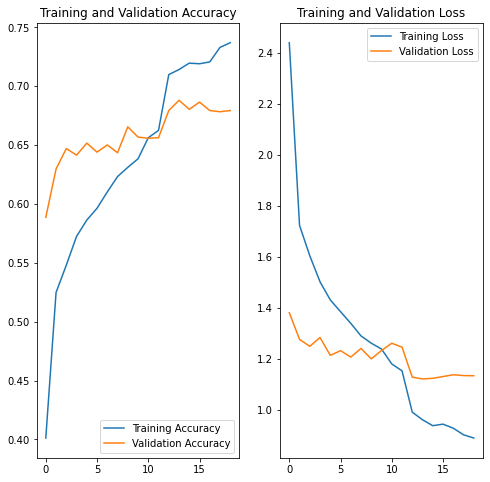

28/28 [==============================] - 8s 293ms/step - loss: 1.1932 - accuracy: 0.6780
[1.1931689977645874, 0.6780432462692261]
31/31 [==============================] - 8s 254ms/step - loss: 1.1333 - accuracy: 0.6793
[1.133317232131958, 0.6793032884597778]
240/240 [==============================] - 131s 546ms/step - loss: 0.7232 - accuracy: 0.7885
[0.7232239246368408, 0.7884527444839478]


In [137]:
train_datagen_P6 = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50,
                                      rotation_range=45,
                                      horizontal_flip = True,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      zoom_range = 0.3,
                                      fill_mode='nearest')
    
valid_datagen_P6 = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50)

x_train_P6 = train_datagen_P6.flow_from_directory(
    "train_P6",
    batch_size= batch_size,   
    shuffle= True, 
    class_mode="categorical",
    target_size=(size, size),
    seed=123)

x_val_P6 = valid_datagen_P6.flow_from_directory(
    "val_P6",
    batch_size= batch_size,
    shuffle= True, 
    class_mode="categorical",
    target_size=(size, size),
    seed=123)

x_test_P6 = valid_datagen_P6.flow_from_directory(
    "test_P6",
    batch_size= batch_size,
    shuffle= True, 
    class_mode="categorical",
    target_size=(size, size),
    seed=123)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(size, size, 3))

base_model.trainable = False


inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x=Dropout(0.3)(x)

x= Dense(1024, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x= Dense(562, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)
outputs=Dense(num_classes,activation='softmax')(x)
model_ResNet50_P6= keras.Model(inputs, outputs)

model_ResNet50_P6.compile(optimizer= 'Nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

history_ResNet50_P6=model_ResNet50_P6.fit(x_train_P6,epochs=200,validation_data=(x_val_P6), callbacks=[early_stopping,reduce_lr])

affichage(history_ResNet50_P6) 

print(model_ResNet50_P6.evaluate(x_test_P6))

print(model_ResNet50_P6.evaluate(x_val_P6))

print(model_ResNet50_P6.evaluate(x_train_P6))

# Données du P7

Found 11523 images belonging to 110 classes.
Found 1486 images belonging to 110 classes.
Found 1335 images belonging to 110 classes.
Epoch 1/200
181/181 [==============================] - 100s 518ms/step - loss: 2.8967 - accuracy: 0.3487 - val_loss: 0.9821 - val_accuracy: 0.6972
Epoch 2/200
181/181 [==============================] - 95s 524ms/step - loss: 1.3820 - accuracy: 0.6159 - val_loss: 0.8863 - val_accuracy: 0.7301
Epoch 3/200
181/181 [==============================] - 99s 546ms/step - loss: 1.1821 - accuracy: 0.6581 - val_loss: 0.8201 - val_accuracy: 0.7476
Epoch 4/200
181/181 [==============================] - 101s 555ms/step - loss: 1.1031 - accuracy: 0.6698 - val_loss: 0.7993 - val_accuracy: 0.7423
Epoch 5/200
181/181 [==============================] - 100s 551ms/step - loss: 1.0520 - accuracy: 0.6849 - val_loss: 0.7977 - val_accuracy: 0.7557
Epoch 6/200
181/181 [==============================] - 101s 559ms/step - loss: 0.9945 - accuracy: 0.7027 - val_loss: 0.8243 - val_accu

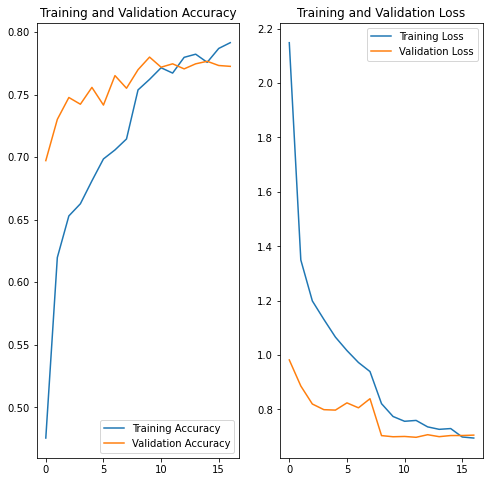

21/21 [==============================] - 7s 310ms/step - loss: 0.6735 - accuracy: 0.8030
[0.6734980940818787, 0.8029962778091431]
24/24 [==============================] - 6s 230ms/step - loss: 0.7057 - accuracy: 0.7725
[0.7057028412818909, 0.772543728351593]
181/181 [==============================] - 96s 530ms/step - loss: 0.5691 - accuracy: 0.8296
[0.5691022872924805, 0.829645037651062]


In [138]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50,
                                      rotation_range=45,
                                      horizontal_flip = True,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      zoom_range = 0.3,
                                      fill_mode='nearest')

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50)

x_train = train_datagen.flow_from_directory(
    "train",
    batch_size= batch_size,
    shuffle= True, 
    class_mode="categorical",
    target_size=(size, size),
    seed=123)

x_val = valid_datagen.flow_from_directory(
    "val",
    batch_size= batch_size,
    shuffle= True, 
    class_mode="categorical",
    target_size=(size, size),
    seed=123)

x_test = valid_datagen.flow_from_directory(
    "test",
    batch_size= batch_size,
    shuffle= True, 
    class_mode="categorical",
    target_size=(size, size),
    seed=123)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(size, size, 3))

base_model.trainable = False

inputs = keras.Input(shape=(size, size, 3))

x = base_model(inputs, training=False)

x=Dropout(0.3)(x)

x= Dense(1024, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x= Dense(562, use_bias=False, kernel_initializer='uniform')(x)
x=BatchNormalization()(x)    
x=Activation("relu")(x)

x=GlobalAveragePooling2D()(x)
x=Dropout(0.3)(x)
outputs=Dense(num_classes,activation='softmax')(x)
model_ResNet50_P7= keras.Model(inputs, outputs)

model_ResNet50_P7.compile(optimizer= 'Nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

history_ResNet50_P7=model_ResNet50_P7.fit(x_train,epochs=200,validation_data=(x_val), callbacks=[early_stopping,reduce_lr])
affichage(history_ResNet50_P7) 

print(model_ResNet50_P7.evaluate(x_test))

print(model_ResNet50_P7.evaluate(x_val))

print(model_ResNet50_P7.evaluate(x_train))

In [140]:
errors("Modèle_P6",model_ResNet50_P6,x_train_P6,x_val_P6,x_test_P6)

28/28 [==============================] - 8s 272ms/step - loss: 1.1932 - accuracy: 0.6780


In [141]:
errors("Modèle_P7",model_ResNet50_P7,x_train,x_val,x_test)

21/21 [==============================] - 5s 244ms/step - loss: 0.6735 - accuracy: 0.8030


In [142]:
results

,Modèle,acc,val_acc,evaluate(x_test)_acc,loss,val_loss,evaluate(x_test)_loss
0,Modèle_P6,0.791065,0.679303,0.678043,0.723349,1.133317,1.193169
0,Modèle_P7,0.832509,0.772544,0.802996,0.567624,0.705703,0.673498
